In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import dynamic_tsne
from importlib import reload
reload(dynamic_tsne)  # Rerun this cell after update
%matplotlib inline

# Preparing Datasets

Iris, MNIST and digits. Customer segmentation data is classified, it won't appear.

Iris and digits are toy datasets. Maybe, for tech report.

## Digits Dataset

Will be used only for reference. To replace by MNIST.

In [2]:
# Load data
data_digits = datasets.load_digits()
X_digits = data_digits.images.reshape((-1, 64)) # 8x8 image to 64-length vector
labels_digits = data_digits.target

temp = np.ascontiguousarray(X_digits).view(np.dtype((np.void, X_digits.dtype.itemsize * X_digits.shape[1])))
_, un_idx = np.unique(temp, return_index=True)
X_digits = X_digits[un_idx, :]
labels_digits = labels_digits[un_idx]

In [3]:
# Run TSNE
dTSNE_digits = dynamic_tsne.DynamicTSNE(perplexity=20)
Y_digits = dTSNE_digits.fit(X_digits, optimizer_kwargs={'momentum': 0.8, 'n_iter': 1000}, random_seed=1)

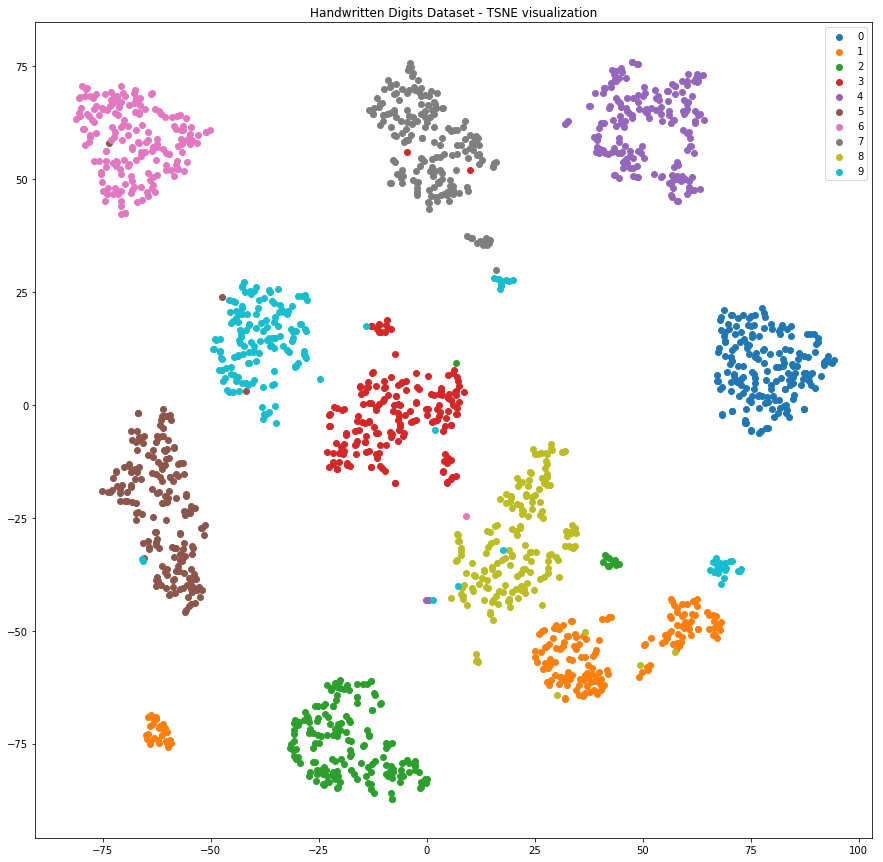

In [4]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_digits)):
    plt.scatter(Y_digits[labels_digits == l, 0], Y_digits[labels_digits == l, 1])
    legend_list.append(str(data_digits.target_names[l]))
plt.title("Handwritten Digits Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()

In [5]:
#km_digits = KMeans(n_clusters=13, random_state=0)
#km_digits.fit(X_digits)

# Cluster Structure Test

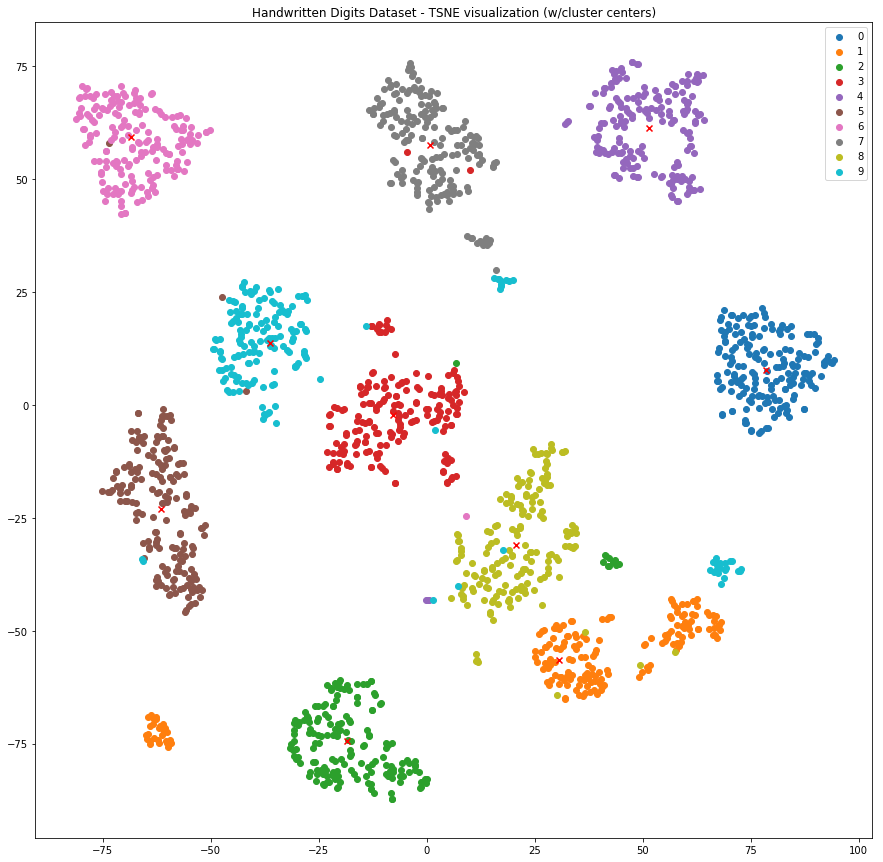

In [7]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_digits)):
    plt.scatter(Y_digits[labels_digits == l, 0], Y_digits[labels_digits == l, 1])
    legend_list.append(str(data_digits.target_names[l]))
centers_y_digits = np.zeros((len(set(labels_digits)),Y_digits.shape[1]))
centers_x_digits = np.zeros((len(set(labels_digits)),X_digits.shape[1]))
# Pick 80% around center
for l in sorted(set(labels_digits)):
    picked_x = X_digits[labels_digits == l, :]
    picked_y = Y_digits[labels_digits==l,:]
    x_center = np.mean(picked_x, axis=0)
    center_dist = np.sqrt(np.sum((picked_x - x_center)**2, axis=1))
    picked_y = picked_y[center_dist < np.percentile(center_dist, 80), :]
    picked_x = picked_x[center_dist < np.percentile(center_dist, 80), :]
    centers_x_digits[l,:] = [np.mean(picked_x[:,i]) for i in range(X_digits.shape[1])]
    centers_y_digits[l,:] = [np.mean(picked_y[:,i]) for i in range(Y_digits.shape[1])]
plt.scatter(centers_y_digits[:,0], centers_y_digits[:,1], c='red', marker='x')
plt.title("Handwritten Digits Dataset - TSNE visualization (w/cluster centers)")
#plt.scatter(Y_digits[[75], 0], Y_digits[[75], 1], marker = 'x', color='black',s=50)
plt.legend(legend_list)
plt.show()

# MNIST Dataset

In [8]:
from tensorflow.examples.tutorials.mnist import input_data

In [9]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
np.random.seed(0)
ind = np.random.choice(np.arange(len(mnist.train.images)), size = 2567) # For 0 random seed 2567 samples have
#exactly 2500 unique ones
X_mnist_raw = mnist.train.images[ind]
labels_mnist = mnist.train.labels[ind]

temp = np.ascontiguousarray(X_mnist_raw).view(np.dtype((np.void, X_mnist_raw.dtype.itemsize * X_mnist_raw.shape[1])))
_, un_idx = np.unique(temp, return_index=True)
X_mnist_raw = X_mnist_raw[un_idx, :]
labels_mnist = labels_mnist[un_idx]

mnist_pca = PCA(n_components=30)
X_mnist = mnist_pca.fit_transform(X_mnist_raw)

labels_mnist_onehot = labels_mnist
labels_mnist = np.argmax(labels_mnist,axis=1)

print(X_mnist.shape)

(2500, 30)


In [11]:
# Run TSNE
dTSNE_mnist = dynamic_tsne.DynamicTSNE(perplexity=30)
Y_mnist = dTSNE_mnist.fit(X_mnist, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                     'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

Found sigma. Average:  1.44087912976
[t-SNE] Iteration 1: error = 23.7850169, gradient norm = 0.0714645
[t-SNE] Iteration 2: error = 22.7682439, gradient norm = 0.0776627
[t-SNE] Iteration 3: error = 23.6709948, gradient norm = 0.0738562
[t-SNE] Iteration 4: error = 23.7284387, gradient norm = 0.0668445
[t-SNE] Iteration 5: error = 23.4090577, gradient norm = 0.0691734
[t-SNE] Iteration 6: error = 23.0633941, gradient norm = 0.0762285
[t-SNE] Iteration 7: error = 22.8880723, gradient norm = 0.0776093
[t-SNE] Iteration 8: error = 22.7150188, gradient norm = 0.0768266
[t-SNE] Iteration 9: error = 22.3571033, gradient norm = 0.0771289
[t-SNE] Iteration 10: error = 21.9254209, gradient norm = 0.0795476
[t-SNE] Iteration 11: error = 21.5016058, gradient norm = 0.0807121
[t-SNE] Iteration 12: error = 21.0710034, gradient norm = 0.0807356
[t-SNE] Iteration 13: error = 20.5468225, gradient norm = 0.0809021
[t-SNE] Iteration 14: error = 20.1288227, gradient norm = 0.0812450
[t-SNE] Iteration 15

[t-SNE] Iteration 119: error = 1.5666622, gradient norm = 0.0018324
[t-SNE] Iteration 120: error = 1.5578607, gradient norm = 0.0017776
[t-SNE] Iteration 121: error = 1.5488121, gradient norm = 0.0016760
[t-SNE] Iteration 122: error = 1.5399397, gradient norm = 0.0014325
[t-SNE] Iteration 123: error = 1.5320089, gradient norm = 0.0014826
[t-SNE] Iteration 124: error = 1.5241252, gradient norm = 0.0014603
[t-SNE] Iteration 125: error = 1.5162073, gradient norm = 0.0014037
[t-SNE] Iteration 126: error = 1.5084982, gradient norm = 0.0013398
[t-SNE] Iteration 127: error = 1.5011295, gradient norm = 0.0012791
[t-SNE] Iteration 128: error = 1.4939038, gradient norm = 0.0013112
[t-SNE] Iteration 129: error = 1.4866456, gradient norm = 0.0012060
[t-SNE] Iteration 130: error = 1.4796832, gradient norm = 0.0011378
[t-SNE] Iteration 131: error = 1.4729368, gradient norm = 0.0011633
[t-SNE] Iteration 132: error = 1.4662497, gradient norm = 0.0011258
[t-SNE] Iteration 133: error = 1.4597579, gradie

[t-SNE] Iteration 240: error = 1.2207677, gradient norm = 0.0002557
[t-SNE] Iteration 241: error = 1.2200429, gradient norm = 0.0002621
[t-SNE] Iteration 242: error = 1.2193238, gradient norm = 0.0002421
[t-SNE] Iteration 243: error = 1.2186187, gradient norm = 0.0002339
[t-SNE] Iteration 244: error = 1.2179232, gradient norm = 0.0002332
[t-SNE] Iteration 245: error = 1.2172367, gradient norm = 0.0002344
[t-SNE] Iteration 246: error = 1.2165606, gradient norm = 0.0002314
[t-SNE] Iteration 247: error = 1.2158917, gradient norm = 0.0002235
[t-SNE] Iteration 248: error = 1.2152309, gradient norm = 0.0002247
[t-SNE] Iteration 249: error = 1.2145786, gradient norm = 0.0002265
[t-SNE] Iteration 250: error = 1.2139335, gradient norm = 0.0002240
[t-SNE] Iteration 251: error = 1.2132976, gradient norm = 0.0002160
[t-SNE] Iteration 252: error = 1.2126718, gradient norm = 0.0002199
[t-SNE] Iteration 253: error = 1.2120529, gradient norm = 0.0002321
[t-SNE] Iteration 254: error = 1.2114402, gradie

[t-SNE] Iteration 361: error = 1.1710351, gradient norm = 0.0001229
[t-SNE] Iteration 362: error = 1.1708083, gradient norm = 0.0001270
[t-SNE] Iteration 363: error = 1.1705820, gradient norm = 0.0001182
[t-SNE] Iteration 364: error = 1.1703578, gradient norm = 0.0001099
[t-SNE] Iteration 365: error = 1.1701358, gradient norm = 0.0001132
[t-SNE] Iteration 366: error = 1.1699144, gradient norm = 0.0001178
[t-SNE] Iteration 367: error = 1.1696937, gradient norm = 0.0001071
[t-SNE] Iteration 368: error = 1.1694756, gradient norm = 0.0001070
[t-SNE] Iteration 369: error = 1.1692580, gradient norm = 0.0001090
[t-SNE] Iteration 370: error = 1.1690424, gradient norm = 0.0001112
[t-SNE] Iteration 371: error = 1.1688276, gradient norm = 0.0001111
[t-SNE] Iteration 372: error = 1.1686133, gradient norm = 0.0001036
[t-SNE] Iteration 373: error = 1.1684013, gradient norm = 0.0001068
[t-SNE] Iteration 374: error = 1.1681903, gradient norm = 0.0001100
[t-SNE] Iteration 375: error = 1.1679808, gradie

[t-SNE] Iteration 482: error = 1.1519548, gradient norm = 0.0000732
[t-SNE] Iteration 483: error = 1.1518480, gradient norm = 0.0000712
[t-SNE] Iteration 484: error = 1.1517419, gradient norm = 0.0000752
[t-SNE] Iteration 485: error = 1.1516366, gradient norm = 0.0000811
[t-SNE] Iteration 486: error = 1.1515321, gradient norm = 0.0000827
[t-SNE] Iteration 487: error = 1.1514276, gradient norm = 0.0000754
[t-SNE] Iteration 488: error = 1.1513240, gradient norm = 0.0000684
[t-SNE] Iteration 489: error = 1.1512218, gradient norm = 0.0000720
[t-SNE] Iteration 490: error = 1.1511203, gradient norm = 0.0000768
[t-SNE] Iteration 491: error = 1.1510191, gradient norm = 0.0000752
[t-SNE] Iteration 492: error = 1.1509185, gradient norm = 0.0000701
[t-SNE] Iteration 493: error = 1.1508184, gradient norm = 0.0000661
[t-SNE] Iteration 494: error = 1.1507191, gradient norm = 0.0000670
[t-SNE] Iteration 495: error = 1.1506206, gradient norm = 0.0000710
[t-SNE] Iteration 496: error = 1.1505222, gradie

[t-SNE] Iteration 603: error = 1.1423277, gradient norm = 0.0000549
[t-SNE] Iteration 604: error = 1.1422679, gradient norm = 0.0000512
[t-SNE] Iteration 605: error = 1.1422086, gradient norm = 0.0000516
[t-SNE] Iteration 606: error = 1.1421496, gradient norm = 0.0000540
[t-SNE] Iteration 607: error = 1.1420906, gradient norm = 0.0000538
[t-SNE] Iteration 608: error = 1.1420320, gradient norm = 0.0000519
[t-SNE] Iteration 609: error = 1.1419739, gradient norm = 0.0000535
[t-SNE] Iteration 610: error = 1.1419159, gradient norm = 0.0000554
[t-SNE] Iteration 611: error = 1.1418579, gradient norm = 0.0000550
[t-SNE] Iteration 612: error = 1.1418001, gradient norm = 0.0000532
[t-SNE] Iteration 613: error = 1.1417427, gradient norm = 0.0000512
[t-SNE] Iteration 614: error = 1.1416856, gradient norm = 0.0000495
[t-SNE] Iteration 615: error = 1.1416286, gradient norm = 0.0000503
[t-SNE] Iteration 616: error = 1.1415719, gradient norm = 0.0000540
[t-SNE] Iteration 617: error = 1.1415154, gradie

[t-SNE] Iteration 724: error = 1.1365532, gradient norm = 0.0000437
[t-SNE] Iteration 725: error = 1.1365134, gradient norm = 0.0000479
[t-SNE] Iteration 726: error = 1.1364734, gradient norm = 0.0000419
[t-SNE] Iteration 727: error = 1.1364338, gradient norm = 0.0000405
[t-SNE] Iteration 728: error = 1.1363946, gradient norm = 0.0000419
[t-SNE] Iteration 729: error = 1.1363557, gradient norm = 0.0000436
[t-SNE] Iteration 730: error = 1.1363170, gradient norm = 0.0000444
[t-SNE] Iteration 731: error = 1.1362785, gradient norm = 0.0000411
[t-SNE] Iteration 732: error = 1.1362403, gradient norm = 0.0000402
[t-SNE] Iteration 733: error = 1.1362024, gradient norm = 0.0000422
[t-SNE] Iteration 734: error = 1.1361648, gradient norm = 0.0000433
[t-SNE] Iteration 735: error = 1.1361272, gradient norm = 0.0000404
[t-SNE] Iteration 736: error = 1.1360899, gradient norm = 0.0000387
[t-SNE] Iteration 737: error = 1.1360529, gradient norm = 0.0000389
[t-SNE] Iteration 738: error = 1.1360161, gradie

[t-SNE] Iteration 845: error = 1.1325414, gradient norm = 0.0000343
[t-SNE] Iteration 846: error = 1.1325154, gradient norm = 0.0000367
[t-SNE] Iteration 847: error = 1.1324894, gradient norm = 0.0000395
[t-SNE] Iteration 848: error = 1.1324634, gradient norm = 0.0000372
[t-SNE] Iteration 849: error = 1.1324373, gradient norm = 0.0000329
[t-SNE] Iteration 850: error = 1.1324113, gradient norm = 0.0000335
[t-SNE] Iteration 851: error = 1.1323855, gradient norm = 0.0000370
[t-SNE] Iteration 852: error = 1.1323596, gradient norm = 0.0000361
[t-SNE] Iteration 853: error = 1.1323336, gradient norm = 0.0000323
[t-SNE] Iteration 854: error = 1.1323077, gradient norm = 0.0000327
[t-SNE] Iteration 855: error = 1.1322817, gradient norm = 0.0000352
[t-SNE] Iteration 856: error = 1.1322557, gradient norm = 0.0000325
[t-SNE] Iteration 857: error = 1.1322298, gradient norm = 0.0000324
[t-SNE] Iteration 858: error = 1.1322039, gradient norm = 0.0000353
[t-SNE] Iteration 859: error = 1.1321778, gradie

[t-SNE] Iteration 966: error = 1.1295897, gradient norm = 0.0000346
[t-SNE] Iteration 967: error = 1.1295693, gradient norm = 0.0000311
[t-SNE] Iteration 968: error = 1.1295490, gradient norm = 0.0000276
[t-SNE] Iteration 969: error = 1.1295289, gradient norm = 0.0000300
[t-SNE] Iteration 970: error = 1.1295088, gradient norm = 0.0000333
[t-SNE] Iteration 971: error = 1.1294886, gradient norm = 0.0000311
[t-SNE] Iteration 972: error = 1.1294685, gradient norm = 0.0000275
[t-SNE] Iteration 973: error = 1.1294485, gradient norm = 0.0000286
[t-SNE] Iteration 974: error = 1.1294286, gradient norm = 0.0000322
[t-SNE] Iteration 975: error = 1.1294086, gradient norm = 0.0000306
[t-SNE] Iteration 976: error = 1.1293887, gradient norm = 0.0000275
[t-SNE] Iteration 977: error = 1.1293689, gradient norm = 0.0000277
[t-SNE] Iteration 978: error = 1.1293491, gradient norm = 0.0000289
[t-SNE] Iteration 979: error = 1.1293294, gradient norm = 0.0000275
[t-SNE] Iteration 980: error = 1.1293098, gradie

[t-SNE] Iteration 1086: error = 1.1274903, gradient norm = 0.0000276
[t-SNE] Iteration 1087: error = 1.1274736, gradient norm = 0.0000305
[t-SNE] Iteration 1088: error = 1.1274565, gradient norm = 0.0000284
[t-SNE] Iteration 1089: error = 1.1274394, gradient norm = 0.0000269
[t-SNE] Iteration 1090: error = 1.1274222, gradient norm = 0.0000265
[t-SNE] Iteration 1091: error = 1.1274051, gradient norm = 0.0000276
[t-SNE] Iteration 1092: error = 1.1273882, gradient norm = 0.0000313
[t-SNE] Iteration 1093: error = 1.1273715, gradient norm = 0.0000310
[t-SNE] Iteration 1094: error = 1.1273550, gradient norm = 0.0000317
[t-SNE] Iteration 1095: error = 1.1273395, gradient norm = 0.0000360
[t-SNE] Iteration 1096: error = 1.1273245, gradient norm = 0.0000484
[t-SNE] Iteration 1097: error = 1.1273076, gradient norm = 0.0000414
[t-SNE] Iteration 1098: error = 1.1272905, gradient norm = 0.0000292
[t-SNE] Iteration 1099: error = 1.1272762, gradient norm = 0.0000432
[t-SNE] Iteration 1100: error = 1.

[t-SNE] Iteration 1205: error = 1.1257534, gradient norm = 0.0000228
[t-SNE] Iteration 1206: error = 1.1257407, gradient norm = 0.0000236
[t-SNE] Iteration 1207: error = 1.1257280, gradient norm = 0.0000226
[t-SNE] Iteration 1208: error = 1.1257153, gradient norm = 0.0000219
[t-SNE] Iteration 1209: error = 1.1257027, gradient norm = 0.0000226
[t-SNE] Iteration 1210: error = 1.1256902, gradient norm = 0.0000235
[t-SNE] Iteration 1211: error = 1.1256777, gradient norm = 0.0000237
[t-SNE] Iteration 1212: error = 1.1256652, gradient norm = 0.0000232
[t-SNE] Iteration 1213: error = 1.1256527, gradient norm = 0.0000234
[t-SNE] Iteration 1214: error = 1.1256403, gradient norm = 0.0000245
[t-SNE] Iteration 1215: error = 1.1256279, gradient norm = 0.0000246
[t-SNE] Iteration 1216: error = 1.1256155, gradient norm = 0.0000224
[t-SNE] Iteration 1217: error = 1.1256032, gradient norm = 0.0000227
[t-SNE] Iteration 1218: error = 1.1255909, gradient norm = 0.0000232
[t-SNE] Iteration 1219: error = 1.

[t-SNE] Iteration 1324: error = 1.1243082, gradient norm = 0.0000206
[t-SNE] Iteration 1325: error = 1.1242988, gradient norm = 0.0000199
[t-SNE] Iteration 1326: error = 1.1242891, gradient norm = 0.0000209
[t-SNE] Iteration 1327: error = 1.1242792, gradient norm = 0.0000204
[t-SNE] Iteration 1328: error = 1.1242692, gradient norm = 0.0000192
[t-SNE] Iteration 1329: error = 1.1242592, gradient norm = 0.0000191
[t-SNE] Iteration 1330: error = 1.1242493, gradient norm = 0.0000200
[t-SNE] Iteration 1331: error = 1.1242395, gradient norm = 0.0000212
[t-SNE] Iteration 1332: error = 1.1242300, gradient norm = 0.0000195
[t-SNE] Iteration 1333: error = 1.1242206, gradient norm = 0.0000189
[t-SNE] Iteration 1334: error = 1.1242115, gradient norm = 0.0000200
[t-SNE] Iteration 1335: error = 1.1242025, gradient norm = 0.0000204
[t-SNE] Iteration 1336: error = 1.1241936, gradient norm = 0.0000196
[t-SNE] Iteration 1337: error = 1.1241848, gradient norm = 0.0000183
[t-SNE] Iteration 1338: error = 1.

[t-SNE] Iteration 1443: error = 1.1232957, gradient norm = 0.0000191
[t-SNE] Iteration 1444: error = 1.1232881, gradient norm = 0.0000185
[t-SNE] Iteration 1445: error = 1.1232805, gradient norm = 0.0000182
[t-SNE] Iteration 1446: error = 1.1232729, gradient norm = 0.0000191
[t-SNE] Iteration 1447: error = 1.1232653, gradient norm = 0.0000177
[t-SNE] Iteration 1448: error = 1.1232577, gradient norm = 0.0000174
[t-SNE] Iteration 1449: error = 1.1232502, gradient norm = 0.0000176
[t-SNE] Iteration 1450: error = 1.1232427, gradient norm = 0.0000173
[t-SNE] Iteration 1451: error = 1.1232352, gradient norm = 0.0000169
[t-SNE] Iteration 1452: error = 1.1232277, gradient norm = 0.0000166
[t-SNE] Iteration 1453: error = 1.1232202, gradient norm = 0.0000167
[t-SNE] Iteration 1454: error = 1.1232127, gradient norm = 0.0000178
[t-SNE] Iteration 1455: error = 1.1232052, gradient norm = 0.0000172
[t-SNE] Iteration 1456: error = 1.1231978, gradient norm = 0.0000163
[t-SNE] Iteration 1457: error = 1.

[t-SNE] Iteration 1562: error = 1.1223912, gradient norm = 0.0000170
[t-SNE] Iteration 1563: error = 1.1223845, gradient norm = 0.0000160
[t-SNE] Iteration 1564: error = 1.1223779, gradient norm = 0.0000159
[t-SNE] Iteration 1565: error = 1.1223713, gradient norm = 0.0000162
[t-SNE] Iteration 1566: error = 1.1223647, gradient norm = 0.0000164
[t-SNE] Iteration 1567: error = 1.1223581, gradient norm = 0.0000155
[t-SNE] Iteration 1568: error = 1.1223516, gradient norm = 0.0000160
[t-SNE] Iteration 1569: error = 1.1223451, gradient norm = 0.0000176
[t-SNE] Iteration 1570: error = 1.1223387, gradient norm = 0.0000176
[t-SNE] Iteration 1571: error = 1.1223322, gradient norm = 0.0000164
[t-SNE] Iteration 1572: error = 1.1223257, gradient norm = 0.0000156
[t-SNE] Iteration 1573: error = 1.1223193, gradient norm = 0.0000162
[t-SNE] Iteration 1574: error = 1.1223128, gradient norm = 0.0000158
[t-SNE] Iteration 1575: error = 1.1223063, gradient norm = 0.0000157
[t-SNE] Iteration 1576: error = 1.

[t-SNE] Iteration 1681: error = 1.1216736, gradient norm = 0.0000140
[t-SNE] Iteration 1682: error = 1.1216681, gradient norm = 0.0000151
[t-SNE] Iteration 1683: error = 1.1216626, gradient norm = 0.0000142
[t-SNE] Iteration 1684: error = 1.1216570, gradient norm = 0.0000137
[t-SNE] Iteration 1685: error = 1.1216515, gradient norm = 0.0000145
[t-SNE] Iteration 1686: error = 1.1216460, gradient norm = 0.0000142
[t-SNE] Iteration 1687: error = 1.1216405, gradient norm = 0.0000153
[t-SNE] Iteration 1688: error = 1.1216350, gradient norm = 0.0000142
[t-SNE] Iteration 1689: error = 1.1216295, gradient norm = 0.0000138
[t-SNE] Iteration 1690: error = 1.1216240, gradient norm = 0.0000147
[t-SNE] Iteration 1691: error = 1.1216185, gradient norm = 0.0000146
[t-SNE] Iteration 1692: error = 1.1216130, gradient norm = 0.0000141
[t-SNE] Iteration 1693: error = 1.1216075, gradient norm = 0.0000136
[t-SNE] Iteration 1694: error = 1.1216020, gradient norm = 0.0000139
[t-SNE] Iteration 1695: error = 1.

[t-SNE] Iteration 1800: error = 1.1210700, gradient norm = 0.0000134
[t-SNE] Iteration 1801: error = 1.1210653, gradient norm = 0.0000134
[t-SNE] Iteration 1802: error = 1.1210607, gradient norm = 0.0000143
[t-SNE] Iteration 1803: error = 1.1210560, gradient norm = 0.0000140
[t-SNE] Iteration 1804: error = 1.1210513, gradient norm = 0.0000124
[t-SNE] Iteration 1805: error = 1.1210467, gradient norm = 0.0000134
[t-SNE] Iteration 1806: error = 1.1210421, gradient norm = 0.0000146
[t-SNE] Iteration 1807: error = 1.1210375, gradient norm = 0.0000133
[t-SNE] Iteration 1808: error = 1.1210328, gradient norm = 0.0000127
[t-SNE] Iteration 1809: error = 1.1210282, gradient norm = 0.0000136
[t-SNE] Iteration 1810: error = 1.1210236, gradient norm = 0.0000150
[t-SNE] Iteration 1811: error = 1.1210191, gradient norm = 0.0000151
[t-SNE] Iteration 1812: error = 1.1210144, gradient norm = 0.0000136
[t-SNE] Iteration 1813: error = 1.1210098, gradient norm = 0.0000132
[t-SNE] Iteration 1814: error = 1.

[t-SNE] Iteration 1919: error = 1.1205556, gradient norm = 0.0000133
[t-SNE] Iteration 1920: error = 1.1205515, gradient norm = 0.0000126
[t-SNE] Iteration 1921: error = 1.1205475, gradient norm = 0.0000120
[t-SNE] Iteration 1922: error = 1.1205435, gradient norm = 0.0000127
[t-SNE] Iteration 1923: error = 1.1205395, gradient norm = 0.0000129
[t-SNE] Iteration 1924: error = 1.1205355, gradient norm = 0.0000117
[t-SNE] Iteration 1925: error = 1.1205315, gradient norm = 0.0000118
[t-SNE] Iteration 1926: error = 1.1205275, gradient norm = 0.0000127
[t-SNE] Iteration 1927: error = 1.1205235, gradient norm = 0.0000139
[t-SNE] Iteration 1928: error = 1.1205196, gradient norm = 0.0000143
[t-SNE] Iteration 1929: error = 1.1205156, gradient norm = 0.0000137
[t-SNE] Iteration 1930: error = 1.1205116, gradient norm = 0.0000126
[t-SNE] Iteration 1931: error = 1.1205076, gradient norm = 0.0000128
[t-SNE] Iteration 1932: error = 1.1205036, gradient norm = 0.0000137
[t-SNE] Iteration 1933: error = 1.

[t-SNE] Iteration 2038: error = 1.1201070, gradient norm = 0.0000130
[t-SNE] Iteration 2039: error = 1.1201034, gradient norm = 0.0000121
[t-SNE] Iteration 2040: error = 1.1200999, gradient norm = 0.0000112
[t-SNE] Iteration 2041: error = 1.1200964, gradient norm = 0.0000120
[t-SNE] Iteration 2042: error = 1.1200928, gradient norm = 0.0000123
[t-SNE] Iteration 2043: error = 1.1200893, gradient norm = 0.0000116
[t-SNE] Iteration 2044: error = 1.1200857, gradient norm = 0.0000112
[t-SNE] Iteration 2045: error = 1.1200822, gradient norm = 0.0000119
[t-SNE] Iteration 2046: error = 1.1200787, gradient norm = 0.0000120
[t-SNE] Iteration 2047: error = 1.1200752, gradient norm = 0.0000110
[t-SNE] Iteration 2048: error = 1.1200717, gradient norm = 0.0000109
[t-SNE] Iteration 2049: error = 1.1200683, gradient norm = 0.0000114
[t-SNE] Iteration 2050: error = 1.1200648, gradient norm = 0.0000121
[t-SNE] Iteration 2051: error = 1.1200613, gradient norm = 0.0000110
[t-SNE] Iteration 2052: error = 1.

[t-SNE] Iteration 2157: error = 1.1197118, gradient norm = 0.0000109
[t-SNE] Iteration 2158: error = 1.1197086, gradient norm = 0.0000104
[t-SNE] Iteration 2159: error = 1.1197055, gradient norm = 0.0000110
[t-SNE] Iteration 2160: error = 1.1197024, gradient norm = 0.0000111
[t-SNE] Iteration 2161: error = 1.1196993, gradient norm = 0.0000106
[t-SNE] Iteration 2162: error = 1.1196962, gradient norm = 0.0000103
[t-SNE] Iteration 2163: error = 1.1196931, gradient norm = 0.0000107
[t-SNE] Iteration 2164: error = 1.1196900, gradient norm = 0.0000119
[t-SNE] Iteration 2165: error = 1.1196869, gradient norm = 0.0000108
[t-SNE] Iteration 2166: error = 1.1196838, gradient norm = 0.0000104
[t-SNE] Iteration 2167: error = 1.1196807, gradient norm = 0.0000114
[t-SNE] Iteration 2168: error = 1.1196776, gradient norm = 0.0000112
[t-SNE] Iteration 2169: error = 1.1196745, gradient norm = 0.0000110
[t-SNE] Iteration 2170: error = 1.1196714, gradient norm = 0.0000106
[t-SNE] Iteration 2171: error = 1.

[t-SNE] Iteration 2276: error = 1.1193541, gradient norm = 0.0000101
[t-SNE] Iteration 2277: error = 1.1193513, gradient norm = 0.0000111
[t-SNE] Iteration 2278: error = 1.1193485, gradient norm = 0.0000115
[t-SNE] Iteration 2279: error = 1.1193457, gradient norm = 0.0000106
[t-SNE] Iteration 2280: error = 1.1193429, gradient norm = 0.0000105
[t-SNE] Iteration 2281: error = 1.1193401, gradient norm = 0.0000108
[t-SNE] Iteration 2282: error = 1.1193373, gradient norm = 0.0000114
[t-SNE] Iteration 2283: error = 1.1193345, gradient norm = 0.0000103
[t-SNE] Iteration 2284: error = 1.1193317, gradient norm = 0.0000098
[t-SNE] Iteration 2285: error = 1.1193289, gradient norm = 0.0000111
[t-SNE] Iteration 2286: error = 1.1193262, gradient norm = 0.0000110
[t-SNE] Iteration 2287: error = 1.1193234, gradient norm = 0.0000099
[t-SNE] Iteration 2288: error = 1.1193206, gradient norm = 0.0000102
[t-SNE] Iteration 2289: error = 1.1193178, gradient norm = 0.0000107
[t-SNE] Iteration 2290: error = 1.

[t-SNE] Iteration 2395: error = 1.1190299, gradient norm = 0.0000110
[t-SNE] Iteration 2396: error = 1.1190272, gradient norm = 0.0000112
[t-SNE] Iteration 2397: error = 1.1190245, gradient norm = 0.0000101
[t-SNE] Iteration 2398: error = 1.1190218, gradient norm = 0.0000100
[t-SNE] Iteration 2399: error = 1.1190191, gradient norm = 0.0000108
[t-SNE] Iteration 2400: error = 1.1190164, gradient norm = 0.0000117
[t-SNE] Iteration 2401: error = 1.1190137, gradient norm = 0.0000117
[t-SNE] Iteration 2402: error = 1.1190110, gradient norm = 0.0000106
[t-SNE] Iteration 2403: error = 1.1190083, gradient norm = 0.0000101
[t-SNE] Iteration 2404: error = 1.1190056, gradient norm = 0.0000109
[t-SNE] Iteration 2405: error = 1.1190029, gradient norm = 0.0000111
[t-SNE] Iteration 2406: error = 1.1190001, gradient norm = 0.0000102
[t-SNE] Iteration 2407: error = 1.1189974, gradient norm = 0.0000102
[t-SNE] Iteration 2408: error = 1.1189947, gradient norm = 0.0000111
[t-SNE] Iteration 2409: error = 1.

[t-SNE] Iteration 2514: error = 1.1184770, gradient norm = 0.0000224
[t-SNE] Iteration 2515: error = 1.1184655, gradient norm = 0.0000213
[t-SNE] Iteration 2516: error = 1.1184538, gradient norm = 0.0000280
[t-SNE] Iteration 2517: error = 1.1184418, gradient norm = 0.0000314
[t-SNE] Iteration 2518: error = 1.1184294, gradient norm = 0.0000366
[t-SNE] Iteration 2519: error = 1.1184162, gradient norm = 0.0000240
[t-SNE] Iteration 2520: error = 1.1184032, gradient norm = 0.0000199
[t-SNE] Iteration 2521: error = 1.1183910, gradient norm = 0.0000312
[t-SNE] Iteration 2522: error = 1.1183781, gradient norm = 0.0000247
[t-SNE] Iteration 2523: error = 1.1183652, gradient norm = 0.0000222
[t-SNE] Iteration 2524: error = 1.1183527, gradient norm = 0.0000281
[t-SNE] Iteration 2525: error = 1.1183400, gradient norm = 0.0000229
[t-SNE] Iteration 2526: error = 1.1183272, gradient norm = 0.0000244
[t-SNE] Iteration 2527: error = 1.1183144, gradient norm = 0.0000253
[t-SNE] Iteration 2528: error = 1.

[t-SNE] Iteration 2633: error = 1.1176234, gradient norm = 0.0000111
[t-SNE] Iteration 2634: error = 1.1176201, gradient norm = 0.0000115
[t-SNE] Iteration 2635: error = 1.1176168, gradient norm = 0.0000112
[t-SNE] Iteration 2636: error = 1.1176135, gradient norm = 0.0000121
[t-SNE] Iteration 2637: error = 1.1176101, gradient norm = 0.0000112
[t-SNE] Iteration 2638: error = 1.1176068, gradient norm = 0.0000115
[t-SNE] Iteration 2639: error = 1.1176034, gradient norm = 0.0000112
[t-SNE] Iteration 2640: error = 1.1176001, gradient norm = 0.0000117
[t-SNE] Iteration 2641: error = 1.1175967, gradient norm = 0.0000121
[t-SNE] Iteration 2642: error = 1.1175931, gradient norm = 0.0000111
[t-SNE] Iteration 2643: error = 1.1175895, gradient norm = 0.0000119
[t-SNE] Iteration 2644: error = 1.1175855, gradient norm = 0.0000151
[t-SNE] Iteration 2645: error = 1.1175812, gradient norm = 0.0000180
[t-SNE] Iteration 2646: error = 1.1175762, gradient norm = 0.0000170
[t-SNE] Iteration 2647: error = 1.

[t-SNE] Iteration 2752: error = 1.1173158, gradient norm = 0.0000083
[t-SNE] Iteration 2753: error = 1.1173139, gradient norm = 0.0000085
[t-SNE] Iteration 2754: error = 1.1173119, gradient norm = 0.0000089
[t-SNE] Iteration 2755: error = 1.1173100, gradient norm = 0.0000101
[t-SNE] Iteration 2756: error = 1.1173081, gradient norm = 0.0000094
[t-SNE] Iteration 2757: error = 1.1173062, gradient norm = 0.0000087
[t-SNE] Iteration 2758: error = 1.1173043, gradient norm = 0.0000083
[t-SNE] Iteration 2759: error = 1.1173023, gradient norm = 0.0000086
[t-SNE] Iteration 2760: error = 1.1173004, gradient norm = 0.0000099
[t-SNE] Iteration 2761: error = 1.1172985, gradient norm = 0.0000090
[t-SNE] Iteration 2762: error = 1.1172966, gradient norm = 0.0000084
[t-SNE] Iteration 2763: error = 1.1172947, gradient norm = 0.0000091
[t-SNE] Iteration 2764: error = 1.1172928, gradient norm = 0.0000093
[t-SNE] Iteration 2765: error = 1.1172909, gradient norm = 0.0000086
[t-SNE] Iteration 2766: error = 1.

[t-SNE] Iteration 2871: error = 1.1170965, gradient norm = 0.0000092
[t-SNE] Iteration 2872: error = 1.1170947, gradient norm = 0.0000083
[t-SNE] Iteration 2873: error = 1.1170930, gradient norm = 0.0000078
[t-SNE] Iteration 2874: error = 1.1170912, gradient norm = 0.0000082
[t-SNE] Iteration 2875: error = 1.1170894, gradient norm = 0.0000085
[t-SNE] Iteration 2876: error = 1.1170877, gradient norm = 0.0000080
[t-SNE] Iteration 2877: error = 1.1170859, gradient norm = 0.0000079
[t-SNE] Iteration 2878: error = 1.1170842, gradient norm = 0.0000083
[t-SNE] Iteration 2879: error = 1.1170824, gradient norm = 0.0000080
[t-SNE] Iteration 2880: error = 1.1170806, gradient norm = 0.0000075
[t-SNE] Iteration 2881: error = 1.1170789, gradient norm = 0.0000078
[t-SNE] Iteration 2882: error = 1.1170771, gradient norm = 0.0000081
[t-SNE] Iteration 2883: error = 1.1170754, gradient norm = 0.0000082
[t-SNE] Iteration 2884: error = 1.1170736, gradient norm = 0.0000077
[t-SNE] Iteration 2885: error = 1.

[t-SNE] Iteration 2990: error = 1.1168945, gradient norm = 0.0000076
[t-SNE] Iteration 2991: error = 1.1168929, gradient norm = 0.0000078
[t-SNE] Iteration 2992: error = 1.1168913, gradient norm = 0.0000079
[t-SNE] Iteration 2993: error = 1.1168897, gradient norm = 0.0000080
[t-SNE] Iteration 2994: error = 1.1168881, gradient norm = 0.0000073
[t-SNE] Iteration 2995: error = 1.1168864, gradient norm = 0.0000072
[t-SNE] Iteration 2996: error = 1.1168848, gradient norm = 0.0000078
[t-SNE] Iteration 2997: error = 1.1168832, gradient norm = 0.0000082
[t-SNE] Iteration 2998: error = 1.1168816, gradient norm = 0.0000080
[t-SNE] Iteration 2999: error = 1.1168800, gradient norm = 0.0000077
[t-SNE] Iteration 3000: error = 1.1168784, gradient norm = 0.0000078


In [12]:
# This takes a while, so we'd better pickle
import pickle
with open('mnist_tsne.p','wb') as f:
    pickle.dump( (dTSNE_mnist, X_mnist, Y_mnist),  f)

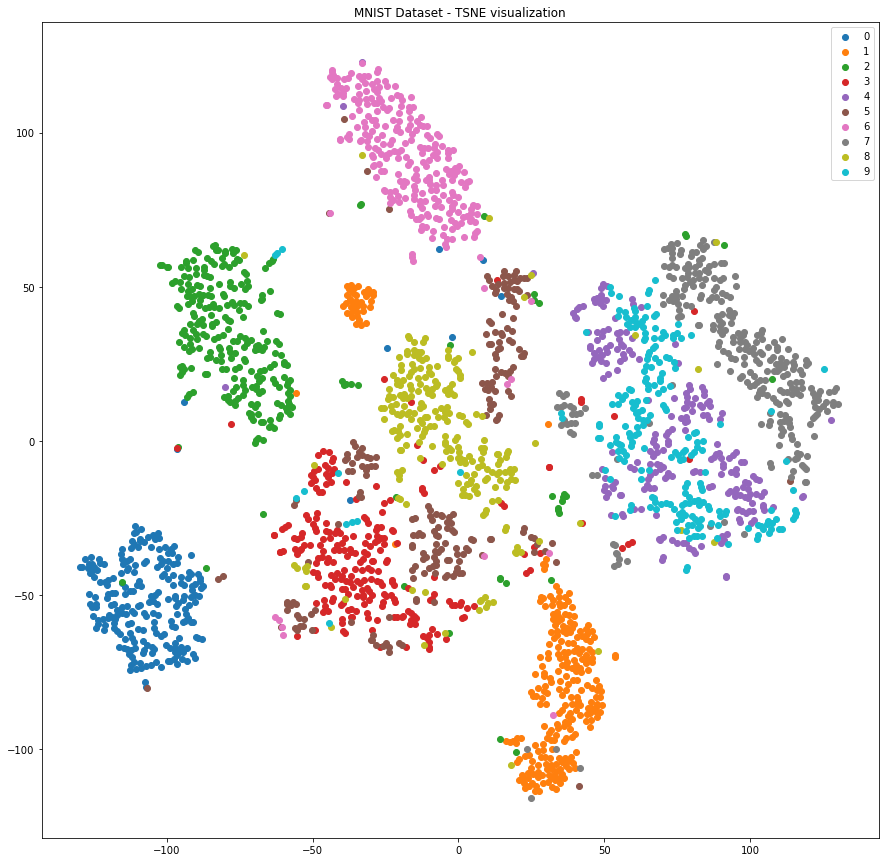

In [13]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_mnist)):
    plt.scatter(Y_mnist[labels_mnist == l, 0], Y_mnist[labels_mnist == l, 1])
    legend_list.append(str(l))
plt.title("MNIST Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()

## MNIST - Cluster Test

In [14]:
# For cluster test we need clusters of X that correspond to most pronounced Y clusters.
# In X we can safely assume .
# By hand: those are 0, two clusters for digit 1, 2, 3, etc.
# Digits 4, 5 and 9 do not correspond to well-pronounced clusters in Y area. Digit 1 correspond to two
# pronounced classes. Clusters for 3 and 8 are loosely defined, but we'll try anyway and see what happens.

centers_y_mnist = np.zeros((len(set(labels_mnist))+1,Y_mnist.shape[1]))
centers_x_mnist = np.zeros((len(set(labels_mnist))+1,X_mnist_raw.shape[1]))

# Pick 80% around center
percentage = 80
for l in sorted(set(labels_mnist)):
    picked_x = X_mnist_raw[labels_mnist == l, :]
    picked_y = Y_mnist[labels_mnist==l,:]
    x_center = np.mean(picked_x, axis=0)
    center_dist = np.sqrt(np.sum((picked_x - x_center)**2, axis=1))
    picked_y = picked_y[center_dist < np.percentile(center_dist, percentage), :]
    picked_x = picked_x[center_dist < np.percentile(center_dist, percentage), :]
    centers_x_mnist[l,:] = [np.mean(picked_x[:,i]) for i in range(X_mnist_raw.shape[1])]
    centers_y_mnist[l,:] = [np.mean(picked_y[:,i]) for i in range(Y_mnist.shape[1])]


l = 1
picked_x = X_mnist_raw[labels_mnist == l, :]
picked_y = Y_mnist[labels_mnist==l,:]
picked_x = picked_x[picked_y[:,1] > 40, :]
picked_y = picked_y[picked_y[:,1] > 40, :]

centers_x_mnist[-1,:] = [np.mean(picked_x[:,i]) for i in range(X_mnist_raw.shape[1])]
centers_y_mnist[-1,:] = [np.mean(picked_y[:,i]) for i in range(Y_mnist.shape[1])]

centers_x_mnist = np.delete(centers_x_mnist, [4,5,9], axis=0)
centers_y_mnist = np.delete(centers_y_mnist, [4,5,9], axis=0)

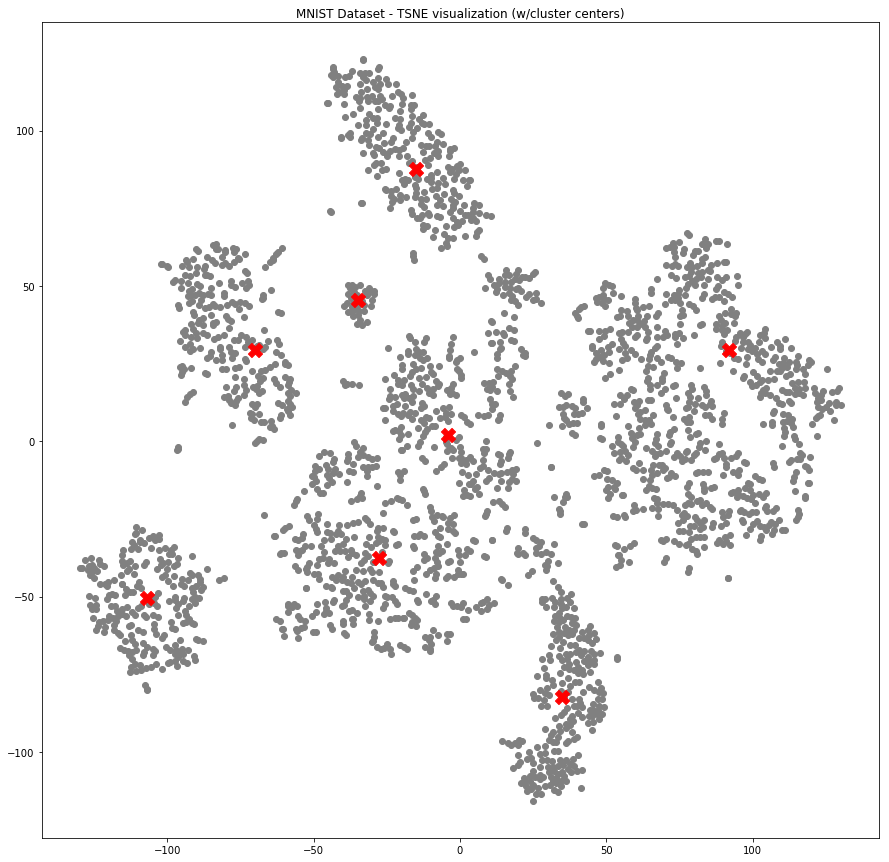

In [15]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
#for l in set(sorted(labels_mnist)):
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray')
#legend_list.append(str(l))
plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200)
plt.title("MNIST Dataset - TSNE visualization (w/cluster centers)")
#plt.legend(legend_list)
plt.show()

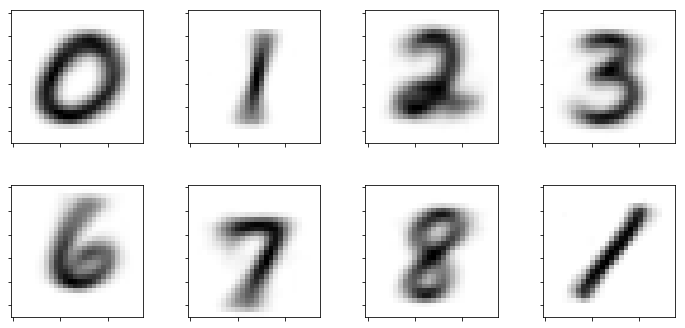

In [65]:
len_subplots = 4
height_subplots = int(np.ceil(len(centers_x_mnist) / len_subplots))
f, ax = plt.subplots(height_subplots,len_subplots)
f.set_size_inches(10,5)
f.tight_layout()
for i in range(len(centers_x_mnist)):
    ax[i//len_subplots][i%len_subplots].imshow(centers_x_mnist[i].reshape(28,28), cmap='gray_r')
    for l in ax[i//len_subplots][i%len_subplots].get_xticklabels():
        l.set_visible(False)
    for l in ax[i//len_subplots][i%len_subplots].get_yticklabels():
        l.set_visible(False)

In [17]:
len_subplots = 4
height_subplots = int(np.ceil(len(centers_x_mnist) / len_subplots))
height_subplots

2

In [18]:
emb_mnist_multiquadric = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'multiquadric'})
emb_mnist_linear = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'linear'})
emb_mnist_cubic = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'cubic'})
emb_mnist_quintic = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'quintic'})
emb_mnist_gaussian = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'gaussian'})
emb_mnist_inverse = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'inverse'})
emb_mnist_thin_plate = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'thin-plate'})

In [36]:
emb_mnist_idw20 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':20})
emb_mnist_idw2 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':2})
emb_mnist_idw1 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':1})
emb_mnist_idwhalf = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':0.5})

In [52]:
centers_x_mnist_pca = mnist_pca.transform(centers_x_mnist)

centers_y_multiquadric = emb_mnist_multiquadric(centers_x_mnist_pca)
centers_y_cubic = emb_mnist_cubic(centers_x_mnist_pca)
centers_y_linear = emb_mnist_linear(centers_x_mnist_pca)
centers_y_quintic = emb_mnist_quintic(centers_x_mnist_pca)
centers_y_gaussian = emb_mnist_gaussian(centers_x_mnist_pca)
centers_y_inverse = emb_mnist_inverse(centers_x_mnist_pca)
centers_y_thin_plate = emb_mnist_thin_plate(centers_x_mnist_pca)

In [53]:
centers_y_idw2 = emb_mnist_idw2(centers_x_mnist_pca)
centers_y_idw20 = emb_mnist_idw20(centers_x_mnist_pca)
centers_y_idwhalf = emb_mnist_idwhalf(centers_x_mnist_pca)
centers_y_idw1 = emb_mnist_idw1(centers_x_mnist_pca)

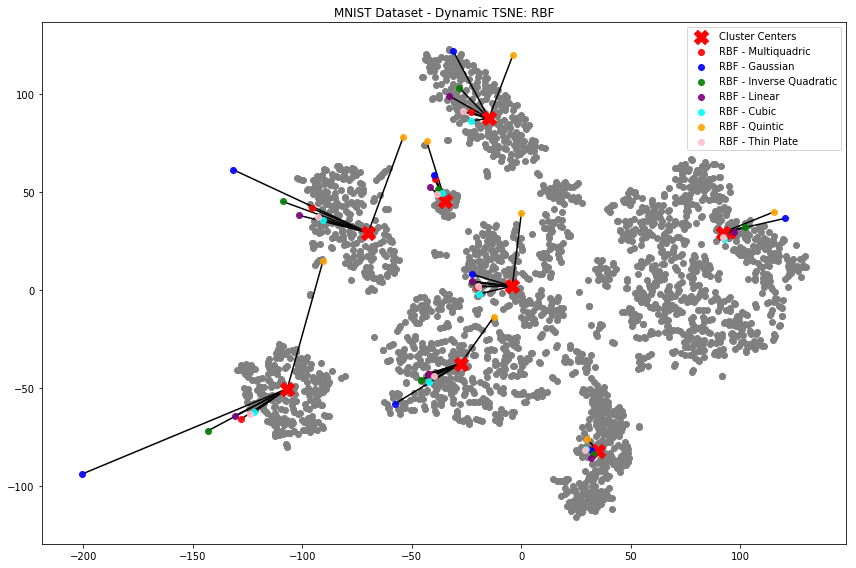

In [54]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(centers_y_mnist)):
    plt.plot([centers_y_mnist[l,0], centers_y_multiquadric[l,0]],
             [centers_y_mnist[l,1], centers_y_multiquadric[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_gaussian[l,0]],
             [centers_y_mnist[l,1], centers_y_gaussian[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_linear[l,0]],
             [centers_y_mnist[l,1], centers_y_linear[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_inverse[l,0]],
             [centers_y_mnist[l,1], centers_y_inverse[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_cubic[l,0]],
             [centers_y_mnist[l,1], centers_y_cubic[l,1]], c='black', label=None, zorder=2)    
    plt.plot([centers_y_mnist[l,0], centers_y_quintic[l,0]],             
             [centers_y_mnist[l,1], centers_y_quintic[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_thin_plate[l,0]],
             [centers_y_mnist[l,1], centers_y_thin_plate[l,1]], c='black', label=None, zorder=2)
    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)
#legend_list.append(str(l))
h1 = plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200, zorder=3)
h2 = plt.scatter(centers_y_multiquadric[:,0], centers_y_multiquadric[:,1], c='red', marker='o', zorder=3,alpha=0.9)
h3 = plt.scatter(centers_y_gaussian[:,0], centers_y_gaussian[:,1], c='blue', marker='o', zorder=3,alpha=0.9)
h4 = plt.scatter(centers_y_inverse[:,0], centers_y_inverse[:,1], c='green', marker='o', zorder=3,alpha=0.9)
h5 = plt.scatter(centers_y_linear[:,0], centers_y_linear[:,1], c='purple', marker='o', zorder=3,alpha=0.9)
h6 = plt.scatter(centers_y_cubic[:,0], centers_y_cubic[:,1], c='cyan', marker='o', zorder=3,alpha=0.9)
h7 = plt.scatter(centers_y_quintic[:,0], centers_y_quintic[:,1], c='orange', marker='o', zorder=3,alpha=0.9)
h8 = plt.scatter(centers_y_thin_plate[:,0], centers_y_thin_plate[:,1], c='pink', marker='o', zorder=3,alpha=0.9)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11], ["Cluster Centers","RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("cluster-test-RBF.png")
plt.show()

In [51]:
centers_y_gaussian

array([[-200.73623873,  -93.91087886],
       [  31.86556752,  -81.42659042],
       [-131.67961497,   61.50394389],
       [ -57.69121394,  -57.96897729],
       [ -31.07940243,  122.06288291],
       [ 120.38038735,   36.6137391 ],
       [ -22.56513896,    8.06933656],
       [ -39.81058238,   58.80348295]])

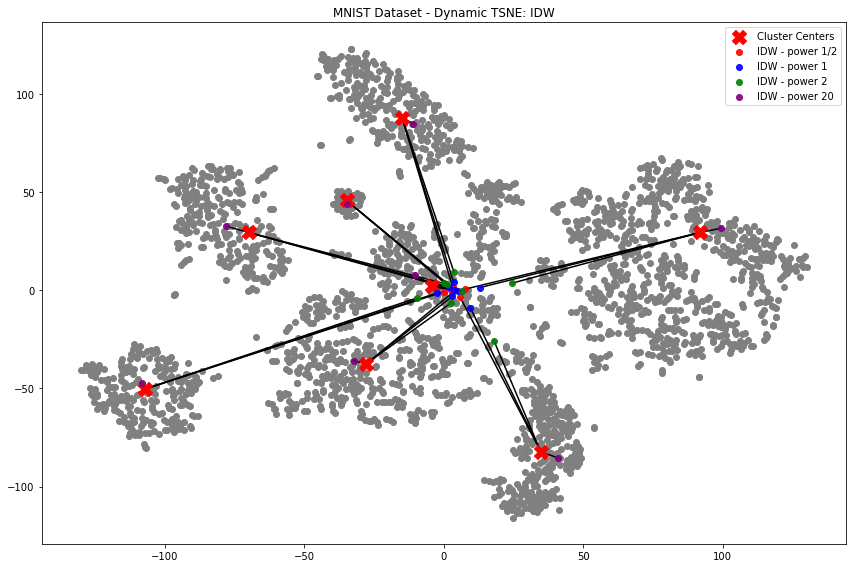

In [77]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(centers_y_mnist)):
    plt.plot([centers_y_mnist[l,0], centers_y_idw20[l,0]],
             [centers_y_mnist[l,1], centers_y_idw20[l,1]], c='black', label=None, zorder=2)       
    plt.plot([centers_y_mnist[l,0], centers_y_idw2[l,0]],
             [centers_y_mnist[l,1], centers_y_idw2[l,1]], c='black', label=None, zorder=2)    
    plt.plot([centers_y_mnist[l,0], centers_y_idw1[l,0]],
             [centers_y_mnist[l,1], centers_y_idw1[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_idwhalf[l,0]],
             [centers_y_mnist[l,1], centers_y_idwhalf[l,1]], c='black', label=None, zorder=2)   
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)
#legend_list.append(str(l))
h1 = plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200, zorder=3)
h2 = plt.scatter(centers_y_idwhalf[:,0], centers_y_idwhalf[:,1], c='red', marker='o', zorder=3,alpha=0.9)
h3 = plt.scatter(centers_y_idw1[:,0], centers_y_idw1[:,1], c='blue', marker='o', zorder=3,alpha=0.9)
h4 = plt.scatter(centers_y_idw2[:,0], centers_y_idw2[:,1], c='green', marker='o', zorder=3,alpha=0.9)
h5 = plt.scatter(centers_y_idw20[:,0], centers_y_idw20[:,1], c='purple', marker='o', zorder=3,alpha=0.9)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4,h5], ["Cluster Centers",'IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("cluster-test-IDW.png")
plt.show()

In [106]:
# TODO get each of those plots in a grid with common legend
np.random.seed(0)
idx_list = [np.random.randint(2000) for i in range(10)]
nearest_neighbor_list = list()
for idx in idx_list:
    nearest_neighbor_idx = np.argsort(np.sum((X_mnist - X_mnist[idx,:])**2, axis=1))[1]
    nearest_neighbor_list.append(nearest_neighbor_idx)
print(idx_list)
print(nearest_neighbor_list)

[684, 559, 1653, 1216, 835, 763, 1731, 1383, 1033, 1747]
[634, 395, 1638, 1944, 844, 1457, 1909, 1976, 1060, 1789]


In [112]:
transition_list = list()
list_multiquadric = list()
list_cubic = list()
list_linear = list()
list_quintic = list()
list_gaussian = list()
list_inverse = list()
list_thin_plate = list()
list_idw1 = list()
list_idwhalf = list()
list_idw2 = list()
list_idw20 = list()
steps = 100

for i in range(len(idx_list)):
    Xtransition = [X_mnist[idx_list[i], :] + (X_mnist[nearest_neighbor_list[i], :] - X_mnist[idx_list[i], :])*j/steps for j in range(steps+1)]
    transition_list.append(Xtransition)
    list_multiquadric.append(emb_mnist_multiquadric(Xtransition))
    list_cubic.append(emb_mnist_cubic(Xtransition))
    list_linear.append(emb_mnist_linear(Xtransition))
    list_quintic.append(emb_mnist_quintic(Xtransition))
    list_gaussian.append(emb_mnist_gaussian(Xtransition))
    list_inverse.append(emb_mnist_inverse(Xtransition))
    list_thin_plate.append(emb_mnist_thin_plate(Xtransition))
    list_idw1.append(emb_mnist_idw1(Xtransition))
    list_idwhalf.append(emb_mnist_idwhalf(Xtransition))
    list_idw2.append(emb_mnist_idw2(Xtransition))
    list_idw20.append(emb_mnist_idw20(Xtransition))

E:\Workspaces\DynamicTSNE\dynamic_tsne.py:647: RuntimeWarning: overflow encountered in true_divide
  break
E:\Workspaces\DynamicTSNE\dynamic_tsne.py:648: RuntimeWarning: invalid value encountered in true_divide
  if not found:
E:\Workspaces\DynamicTSNE\dynamic_tsne.py:647: RuntimeWarning: divide by zero encountered in true_divide
  break


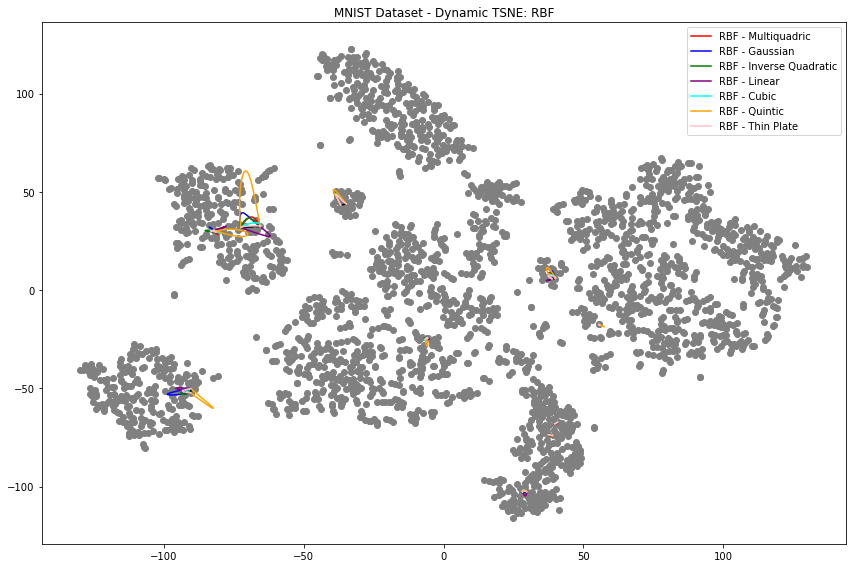

In [121]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx_list)):
    plt.plot([Y_mnist[idx_list[l],0], Y_mnist[nearest_neighbor_list[l],0]],
             [Y_mnist[idx_list[l],1], Y_mnist[nearest_neighbor_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(list_multiquadric[l][:,0], list_multiquadric[l][:,1], c='red', zorder=3)
    h2, = plt.plot(list_gaussian[l][:,0], list_gaussian[l][:,1], c='blue', zorder=3)
    h3, = plt.plot(list_inverse[l][:,0], list_inverse[l][:,1], c='green', zorder=3)
    h4, = plt.plot(list_linear[l][:,0], list_linear[l][:,1], c='purple', zorder=3)
    h5, = plt.plot(list_cubic[l][:,0], list_cubic[l][:,1], c='cyan', zorder=3)
    h6, = plt.plot(list_quintic[l][:,0], list_quintic[l][:,1], c='orange', zorder=3)
    h7, = plt.plot(list_thin_plate[l][:,0], list_thin_plate[l][:,1], c='pink', zorder=3)     
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7], ["RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("continuity-test-RBF.png")
plt.show()

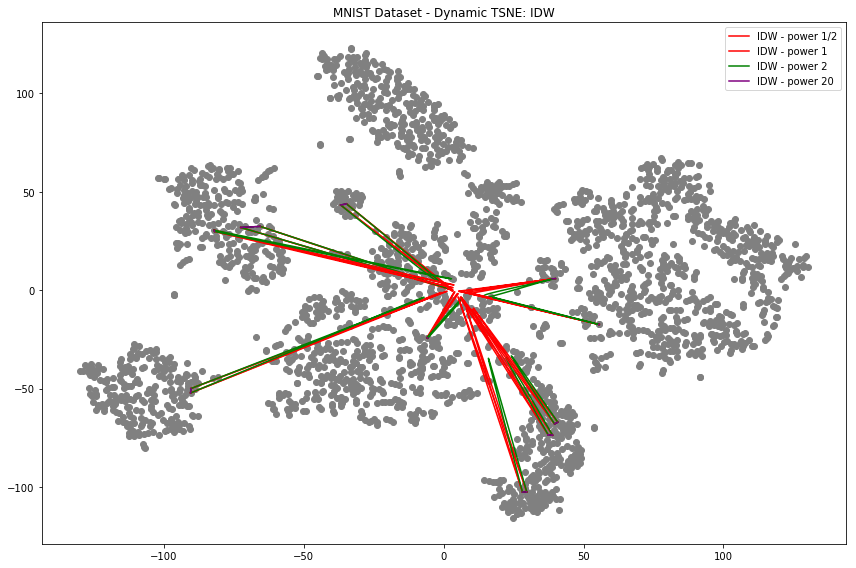

In [122]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx_list)):
    plt.plot([Y_mnist[idx_list[l],0], Y_mnist[nearest_neighbor_list[l],0]],
             [Y_mnist[idx_list[l],1], Y_mnist[nearest_neighbor_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(list_idwhalf[l][:,0], list_idwhalf[l][:,1], c='red', zorder=3)
    h2, = plt.plot(list_idw1[l][:,0], list_idw1[l][:,1], c='red', zorder=3)
    h3, = plt.plot(list_idw2[l][:,0], list_idw2[l][:,1], c='green', zorder=3)
    h4, = plt.plot(list_idw20[l][:,0], list_idw20[l][:,1], c='purple', zorder=3)    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4], ['IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("continuity-test-IDW.png")
plt.show()

In [125]:
# TODO get each of those plots in a grid with common legend
np.random.seed(15)
idx1_list = [np.random.randint(2000) for i in range(5)]
idx2_list = [np.random.randint(2000) for i in range(len(idx1_list))]



In [135]:
t_transition_list = list()
t_transition_raw_list = list()
t_list_multiquadric = list()
t_list_cubic = list()
t_list_linear = list()
t_list_quintic = list()
t_list_gaussian = list()
t_list_inverse = list()
t_list_thin_plate = list()
t_list_idw1 = list()
t_list_idwhalf = list()
t_list_idw2 = list()
t_list_idw20 = list()
steps = 100

for i in range(len(idx1_list)):
    Xtransition = [X_mnist[idx1_list[i], :] + (X_mnist[idx2_list[i], :] - X_mnist[idx1_list[i], :])*j/steps for j in range(steps+1)]
    X_raw_transition = [X_mnist_raw[idx1_list[i], :] + (X_mnist_raw[idx2_list[i], :] - X_mnist_raw[idx1_list[i], :])*j/steps for j in range(steps+1)]
    t_transition_list.append(Xtransition)
    t_transition_raw_list.append(X_raw_transition)
    t_list_multiquadric.append(emb_mnist_multiquadric(Xtransition))
    t_list_cubic.append(emb_mnist_cubic(Xtransition))
    t_list_linear.append(emb_mnist_linear(Xtransition))
    t_list_quintic.append(emb_mnist_quintic(Xtransition))
    t_list_gaussian.append(emb_mnist_gaussian(Xtransition))
    t_list_inverse.append(emb_mnist_inverse(Xtransition))
    t_list_thin_plate.append(emb_mnist_thin_plate(Xtransition))
    t_list_idw1.append(emb_mnist_idw1(Xtransition))
    t_list_idwhalf.append(emb_mnist_idwhalf(Xtransition))
    t_list_idw2.append(emb_mnist_idw2(Xtransition))
    t_list_idw20.append(emb_mnist_idw20(Xtransition))

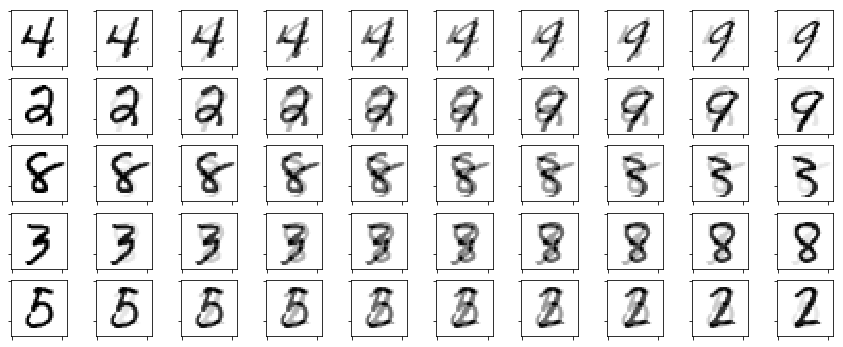

In [142]:
len_subplots = 10
height_subplots = len(t_transition_list)
f, ax = plt.subplots(height_subplots,len_subplots)
f.set_size_inches(15,6)
#f.tight_layout()
f.subplots_adjust()
for i in range(len(t_transition_list)):
    for j in range(len_subplots):
        ax[i][j].imshow(t_transition_raw_list[i][j*steps//len_subplots].reshape(28,28), cmap='gray_r')
        for l in ax[i][j].get_xticklabels():
            l.set_visible(False)
        for l in ax[i][j].get_yticklabels():
            l.set_visible(False)
f.savefig("transition-examples.png")

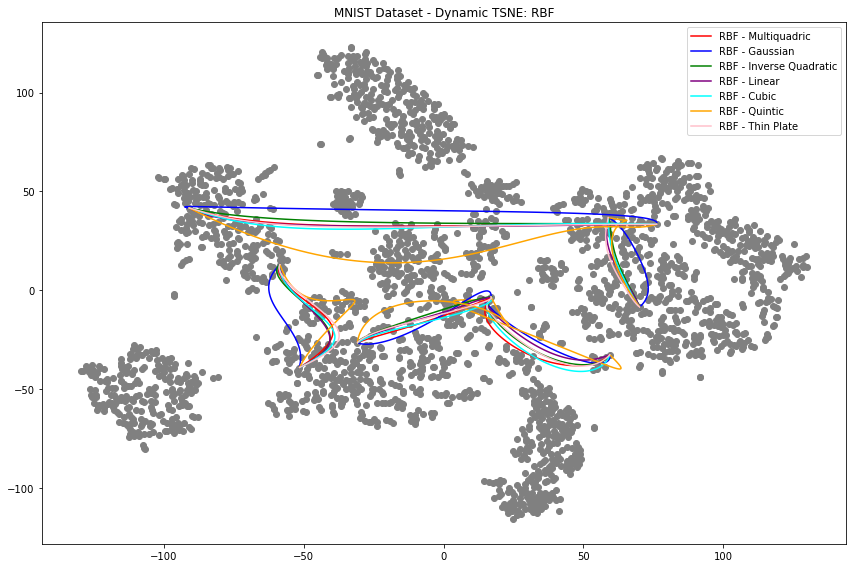

In [128]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx1_list)):
    #plt.plot([Y_mnist[idx_list1[l],0], Y_mnist[idx_list2[l],0]],
    #         [Y_mnist[idx_list1[l],1], Y_mnist[idx_list2[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(t_list_multiquadric[l][:,0], t_list_multiquadric[l][:,1], c='red', zorder=3)
    h2, = plt.plot(t_list_gaussian[l][:,0], t_list_gaussian[l][:,1], c='blue', zorder=3)
    h3, = plt.plot(t_list_inverse[l][:,0], t_list_inverse[l][:,1], c='green', zorder=3)
    h4, = plt.plot(t_list_linear[l][:,0], t_list_linear[l][:,1], c='purple', zorder=3)
    h5, = plt.plot(t_list_cubic[l][:,0], t_list_cubic[l][:,1], c='cyan', zorder=3)
    h6, = plt.plot(t_list_quintic[l][:,0], t_list_quintic[l][:,1], c='orange', zorder=3)
    h7, = plt.plot(t_list_thin_plate[l][:,0], t_list_thin_plate[l][:,1], c='pink', zorder=3)     
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7], ["RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("transition-test-RBF.png")
plt.show()

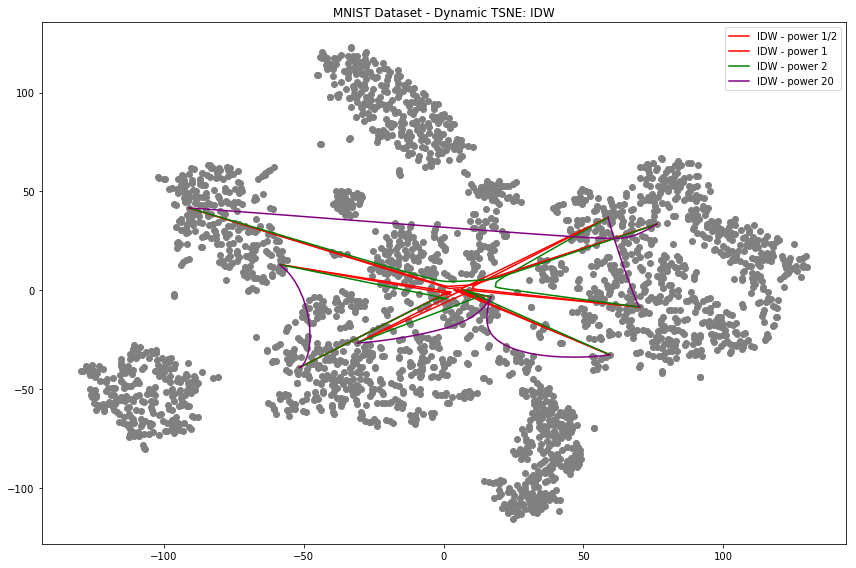

In [130]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx1_list)):
    #plt.plot([Y_mnist[idx1_list[l],0], Y_mnist[idx2_list[l],0]],
    #         [Y_mnist[idx1_list[l],1], Y_mnist[idx2_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(t_list_idwhalf[l][:,0], t_list_idwhalf[l][:,1], c='red', zorder=3)
    h2, = plt.plot(t_list_idw1[l][:,0], t_list_idw1[l][:,1], c='red', zorder=3)
    h3, = plt.plot(t_list_idw2[l][:,0], t_list_idw2[l][:,1], c='green', zorder=3)
    h4, = plt.plot(t_list_idw20[l][:,0], t_list_idw20[l][:,1], c='purple', zorder=3)    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4], ['IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("transition-test-IDW.png")
plt.show()

In [146]:
Xfar = [100]*30
print("Multiquadric", emb_mnist_multiquadric(Xfar))
print("Cubic", emb_mnist_cubic(Xfar))
print("Linear", emb_mnist_linear(Xfar))
print("Quintic", emb_mnist_quintic(Xfar))
print("Gaussian", emb_mnist_gaussian(Xfar))
print("Inverse", emb_mnist_inverse(Xfar))
print("Thin plate", emb_mnist_thin_plate(Xfar))
print("IDW1", emb_mnist_idw1(Xfar))
print("IDW0.5", emb_mnist_idwhalf(Xfar))
print("IDW2", emb_mnist_idw2(Xfar))
print("IDW20", emb_mnist_idw20(Xfar))

Multiquadric [[ 146.86014442 -213.65236831]]
Cubic [[-1383505.73797394 -2653493.31344721]]
Linear [[ 1031.88534854   249.70780827]]
Quintic [[  5.68505569e+10   4.15478626e+11]]
Gaussian [[ 0.  0.]]
Inverse [[-0.03654526  0.05186717]]
Thin plate [[ 234703.63970837   17253.30255508]]
IDW1 [[ 2.62000741 -0.03740891]]
IDW0.5 [[ 2.62047504 -0.05507833]]
IDW2 [[  2.61905179e+00  -2.06176861e-03]]
IDW20 [[ 2.59726147  0.63612289]]
